Q1. (5 pts) Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-dataLinks to an external site.  or https://www.kaggle.com/datasets/imakash3011/customer-personality-analysisLinks to an external site. . How are you handling nulls? What process(es) are you using to encode and normalize the data?
I am handling nulls by using fillna and for normilization of data I used, pdgetdummies, mapping, and standard scaler. 

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
#preprocessing 
Mark_df = pd.read_csv("marketing_campaign.csv", delimiter='\t')
edu_map = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
marital_map = {'Single': 1, 'Married': 2, 'Together': 2, 'Divorced': 3, 'Widow': 4}
Mark_df['Education'] = Mark_df['Education'].map(edu_map)
Mark_df['Marital_Status'] = Mark_df['Marital_Status'].map(marital_map)
Mark_df = Mark_df.fillna(-1)
#using for loop to drop everything but year.
for col in Mark_df.columns:
    if 'Date' in col or 'Dt_' in col:  
        Mark_df[col] = pd.to_datetime(Mark_df[col], format='mixed', dayfirst=True).dt.year



columns_to_one_hot = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
                       'Recency','MntWines','MntFruits','MntMeatProducts', 
                       'MntFishProducts','MntSweetProducts', 'MntGoldProds',
                       'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                       'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3',
                       'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
                       'Complain','Z_CostContact','Z_Revenue','Response']

Mark_df = pd.get_dummies(Mark_df, columns=columns_to_one_hot, drop_first=True)
X = Mark_df.drop('Income', axis=1) 
y = Mark_df['Income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Mark_df.isnull()
#this told me there are no null values so no need to train it to respond to anything else
scaler = MinMaxScaler()
scaled = scaler.fit_transform(Mark_df)
#I used a scaler for normilization of the dataset

Q2. (10 pts) Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?             
I felt like the subset of income, education, and meat products are strongly correlated. The better the education, there tends to be a better income to buy luxury foods like meat. The ideal number of clusters will be 9 because the elbow cluster model is what determines the ideal number of clusters. The elbow clusters represent the number of clusters as inertia slows down. The lesser the clusters the better the model and it had a relatively low inerta and distortion. 

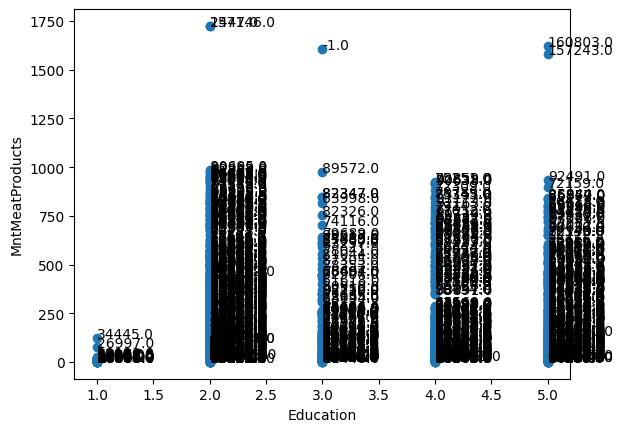

Text(0.5, 1.0, 'Elbow Method with Inertia')

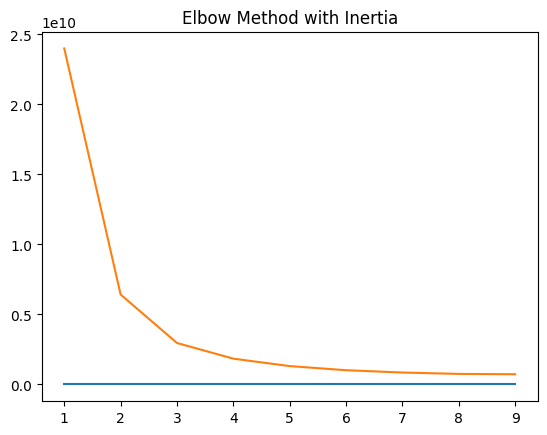

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
Mark_df = pd.read_csv("marketing_campaign.csv", delimiter='\t')
Mark_df['Education'] = Mark_df['Education'].map({'Graduation': 2, 'PhD': 5, 'Master': 4, 'Basic': 1, '2n Cycle': 3})
Mark_df['Marital_Status'] = Mark_df['Marital_Status'].map({'Single': 1, 'Married': 2, 'Together': 2, 'Divorced': 3, 'Widow': 4})
Mark_df = Mark_df.fillna(-1)

#Had to do this here because the error was that it wouldn't take str to float types.
X = Mark_df.select_dtypes(include=['int64', 'float64']).drop('Income', axis=1)
#Stuff from class
y = Mark_df['Income']
plt.scatter(X['Education'], X['MntMeatProducts'])
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Education'][i], X['MntMeatProducts'][i]))
plt.xlabel('Education')
plt.ylabel('MntMeatProducts')
plt.show()
inertias = []
distortions = []

for k in range(1,10):
    model = KMeans(n_clusters=k).fit(X)
    distance = cdist(X, model.cluster_centers_, 'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')


Q3. (7 pts) Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

The 12 clusters is the ideal number and the clustering with distortions/inerta results with 9 clusters. Clustering with this technique is usually done by counting the number of k(number of instances), with the dendrogram there is almost an infinente number of branching so its kind of imposible to do that way.

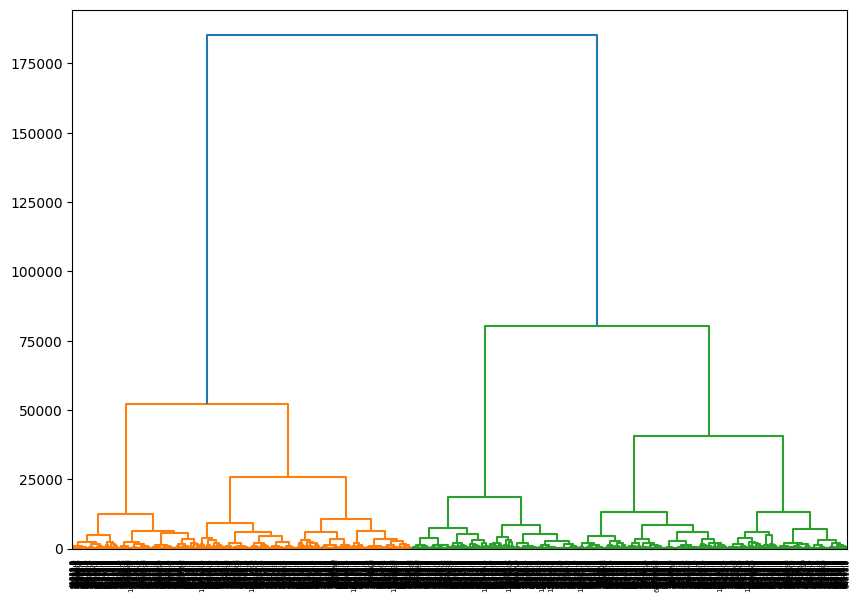

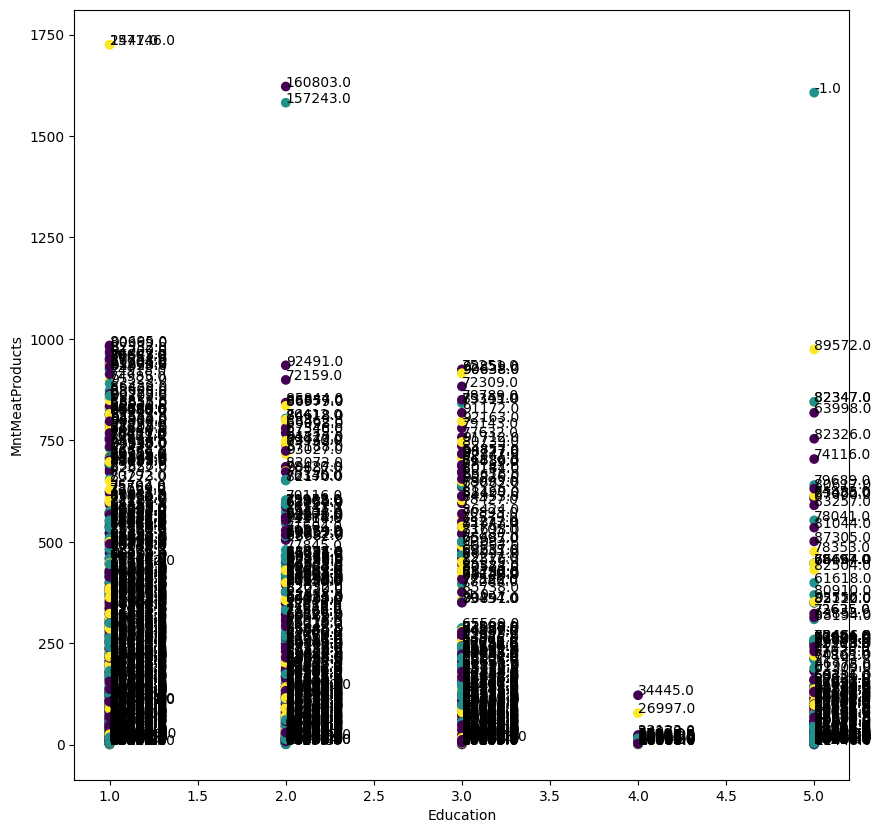

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X['Education'],X['MntMeatProducts'],c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Education'][i],X['MntMeatProducts'][i]))

plt.xlabel('Education')
plt.ylabel('MntMeatProducts')
plt.show()

Q4. (3 pts) Compare the results of 2 and 3. Which approach do you think is best? Why?

I believe Heirachial is better because it shows the relationship between branching of coulumns to get an output which is more preferable than a bunch of data points with no correlation and if there is one its logarithmic and fairly week so you can't determine which branch it comes from. It also shows the relationship between cluster groups which is way harder to derive from clustering.